In [543]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

In [544]:
# Se ha modificado el csv externamente sustituyendo las , por . en los datos de gpa
df = pd.read_csv('AdmissionCSV.csv', sep=';')
df.head()

,admit,gre,gpa,ses,Gender_Male,Race,rank
0,Not admitted,380,3.61,1,0,3,3
1,Admitted,660,3.67,2,0,2,3
2,Admitted,800,4.00,2,0,2,1
3,Admitted,640,3.19,1,1,2,4
4,Not admitted,520,2.93,3,1,2,4


In [545]:
df_objetivo = 'admit'

In [546]:
df[df_objetivo].describe()

count              400
unique               4
top       Not admitted
freq               271
Name: admit, dtype: object

In [547]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   admit        400 non-null    object 
 1   gre          400 non-null    int64  
 2   gpa          400 non-null    float64
 3   ses          400 non-null    int64  
 4   Gender_Male  400 non-null    int64  
 5   Race         400 non-null    int64  
 6   rank         400 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 22.0+ KB


In [548]:
df.isnull().sum()

admit          0
gre            0
gpa            0
ses            0
Gender_Male    0
Race           0
rank           0
dtype: int64

In [549]:
df.columns

Index(['admit', 'gre', 'gpa', 'ses', 'Gender_Male', 'Race', 'rank'], dtype='object')

In [550]:
df.shape

(400, 7)

In [551]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

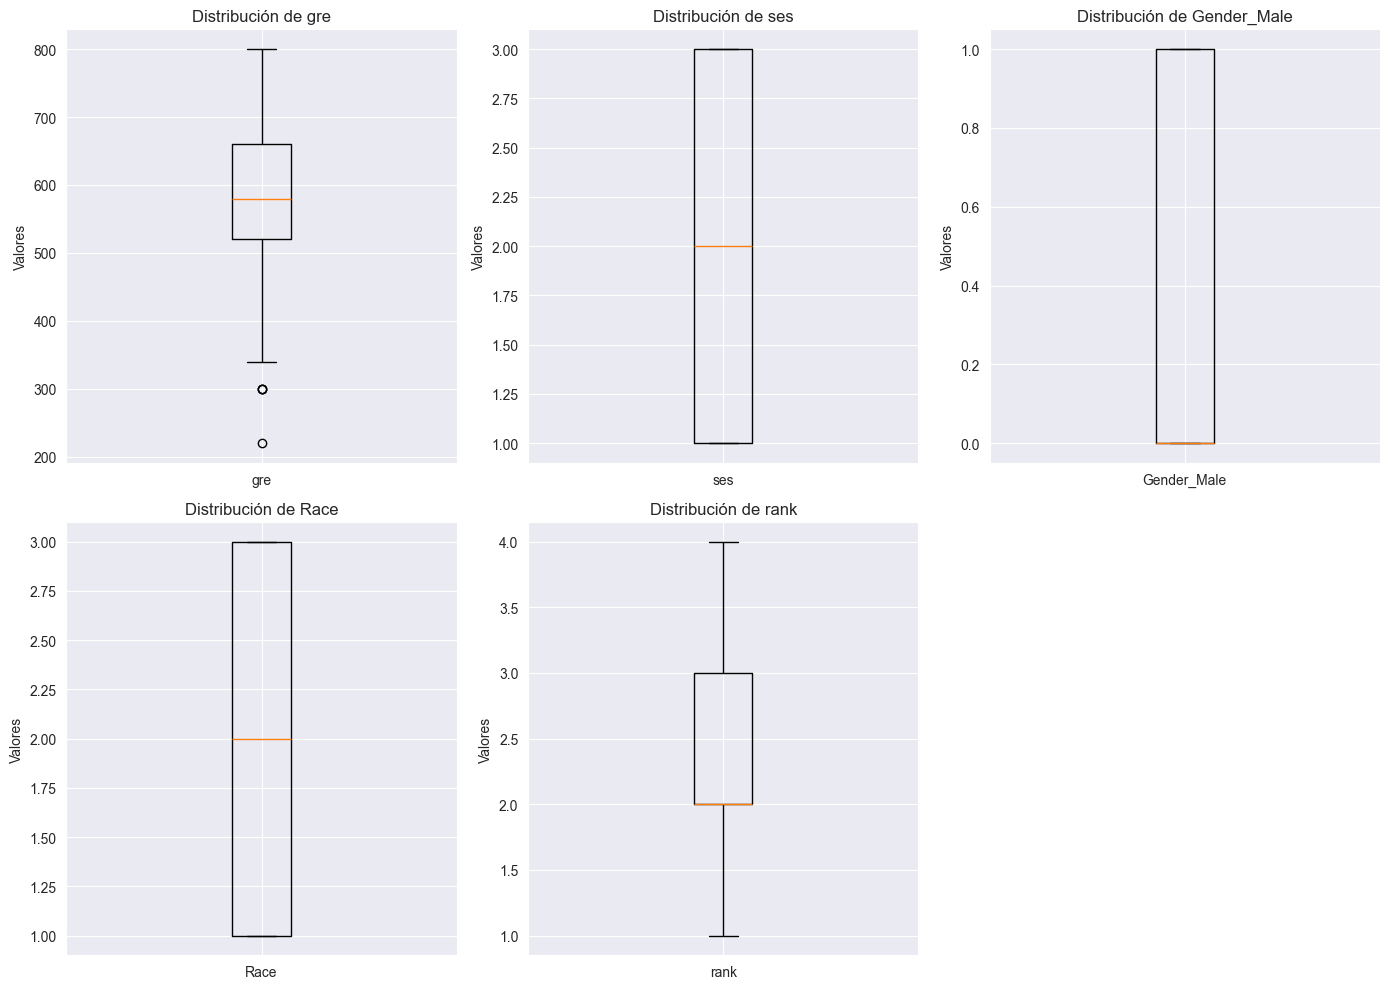

In [552]:
categorias = ['gre', 'ses', 'Gender_Male', 'Race', 'rank']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))
axes = axes.flatten()
for i, var in enumerate(categorias):
 axes[i].boxplot(df[var], tick_labels=[var])
 axes[i].set_title(f'Distribución de {var}')
 axes[i].set_ylabel('Valores')
for j in range(len(categorias), len(axes)):
 axes[j].axis('off')
plt.tight_layout()
plt.show()

In [553]:
df['admit'].value_counts()

admit
Not admitted    271
Admitted        125
Not admitt        2
Admitt            2
Name: count, dtype: int64

In [554]:
df['admit'] = df['admit'].replace(['Admitt', 'Not admitt'], ['Admitted', 'Not admitted'])
df['admit'] = df['admit'].replace(['Admitted', 'Not admitted'], [1, 0])

C:\Users\ESP\AppData\Local\Temp\ipykernel_10252\332171788.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['admit'] = df['admit'].replace(['Admitted', 'Not admitted'], [1, 0])


In [555]:
df['admit'].value_counts()

admit
0    273
1    127
Name: count, dtype: int64

In [556]:
df['gre'].value_counts()

gre
620    30
580    29
540    27
800    25
560    24
660    24
520    24
600    23
700    22
640    21
500    21
680    20
480    16
460    14
720    11
740    11
400    11
440    10
380     8
420     7
760     5
780     5
360     4
340     4
300     3
220     1
Name: count, dtype: int64

In [557]:
df['Race'].value_counts()

Race
1    143
2    129
3    128
Name: count, dtype: int64

In [558]:
df['rank'].value_counts()

rank
2    151
3    121
4     67
1     61
Name: count, dtype: int64

In [559]:
df['ses'].value_counts()

ses
2    139
1    132
3    129
Name: count, dtype: int64

In [560]:
df['gpa'].value_counts()

gpa
4.00    28
3.31     8
3.35     7
3.40     7
3.45     7
        ..
3.09     1
2.65     1
3.06     1
3.03     1
2.63     1
Name: count, Length: 132, dtype: int64

In [561]:
def detecta_outliers_zscore(datos):
 outliers= []
 limite = 2
 media= np.mean(datos)
 desviacion_estandar = np.std(datos)
 print('Media:', media, 'desviación estándar:', desviacion_estandar)
 for x in datos:
  z_score = (x - media) / desviacion_estandar
  if np.abs(z_score) > limite:
   outliers.append(x)
 return outliers
outliers = detecta_outliers_zscore(df['gre'])
print("Outliers usando método Z-score:", outliers)


Media: 587.7 desviación estándar: 115.37205034149302
Outliers usando método Z-score: [300, 340, 340, 300, 340, 220, 300, 340]


In [562]:
df['gre'] = df['gre'].where(df['gre'] > 220)
print("Outliers usando método Z-score:", detecta_outliers_zscore(df['gre']))

Media: 588.6215538847118 desviación estándar: 114.03668510820387
Outliers usando método Z-score: [360.0, 360.0, 300.0, 340.0, 360.0, 340.0, 300.0, 340.0, 360.0, 300.0, 340.0]


In [563]:
df['gre'].value_counts()

gre
620.0    30
580.0    29
540.0    27
800.0    25
560.0    24
520.0    24
660.0    24
600.0    23
700.0    22
500.0    21
640.0    21
680.0    20
480.0    16
460.0    14
720.0    11
400.0    11
740.0    11
440.0    10
380.0     8
420.0     7
760.0     5
780.0     5
360.0     4
340.0     4
300.0     3
Name: count, dtype: int64

In [564]:
# Separar características (X) y variable objetivo (y)
X = df
y = df["admit"]       # Variable objetivo

# Dividimos los datos en un 80% para entrenamiento y un 20% para evaluación (validación + test)
X_train, X_temp, y_train, y_temp = train_test_split(df, y, test_size=0.2, random_state=42)

# De los datos temporales (X_temp, y_temp), dividimos en validación (10%) y test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Entrenar el modelo
rfc = RandomForestClassifier(random_state=42, max_depth=7, min_samples_split=10)
rfc.fit(X_train, y_train)  # Usar X_train y y_train

# Predecir sobre el conjunto de validación
predicciones = rfc.predict(X_val)  # Usar X_val para predicciones

# Calcular el error
error_val = mean_absolute_error(y_val, predicciones)  # Comparar con y_val
print(f'Métrica para datos de validación: {error_val}')

Métrica para datos de validación: 0.0


In [565]:
# Funcion para probar modelos
def train_validation(model):
 model.fit(X_train,y_train.astype(int))
 y_pred = model.predict(X_test)
 conf_matrix = confusion_matrix(y_pred, y_test)
 print(classification_report(y_pred, y_test.astype(int)))
 print('score_test = ', model.score(X_test, y_test.astype(int)))
 print('score_train = ', model.score(X_train, y_train.astype(int)))
 plt.figure(figsize=(6, 4))
 sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
 xticklabels=["no admitido", "admitido"], yticklabels=["no admitido",
 "admitido"])
 plt.title("Matriz de Confusión")
 plt.xlabel("Predicción")
 plt.ylabel("Real")
 plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        16

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

score_test =  1.0
score_train =  1.0


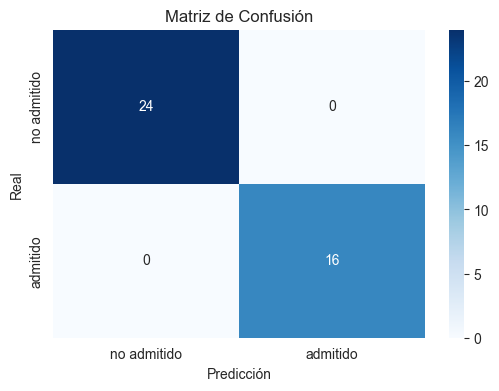

In [566]:
train_validation(rfc)

In [567]:
print("Accuracy :", metrics.accuracy_score(y, rfc.predict(X)) )
print("AUC:", metrics.roc_auc_score(y, rfc.predict_proba(X)[:,1]) )
print("Matriz de confusión:",metrics.confusion_matrix(y, rfc.predict(X)))
print("Informe de la clasificación:", metrics.classification_report(y, rfc.predict(X)))
y_pred = [0, 1, 0, 0]
y_true = [0, 1, 0, 1]
print("Accuracy:", metrics.accuracy_score(y_true, y_pred))
print("Precisión:", metrics.precision_score(y_true, y_pred))
print("Recall:", metrics.recall_score(y_true, y_pred))
recalls = metrics.recall_score(y_true, y_pred, average=None)
print("Recall/especificidad clase 0:", recalls[0])
print("Recall/especificidad clase 1:", recalls[1])
print("Accuracy balanceada:", recalls.mean())
p, r, f, s = metrics.precision_recall_fscore_support(y_true, y_pred)
print("Precisión:", p)
print("Recall:", r)
print("F:", f)
print("Soporte:", s);

Accuracy : 1.0
AUC: 1.0
Matriz de confusión: [[273   0]
 [  0 127]]
Informe de la clasificación:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       1.00      1.00      1.00       127

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Accuracy: 0.75
Precisión: 1.0
Recall: 0.5
Recall/especificidad clase 0: 1.0
Recall/especificidad clase 1: 0.5
Accuracy balanceada: 0.75
Precisión: [0.66666667 1.        ]
Recall: [1.  0.5]
F: [0.8        0.66666667]
Soporte: [2 2]


Hemos obtenio una precision del 0.75, podemos concluir que el modelo presenta overfitting, hay pocos valores para el entrenamiento del modelo dado que los valores de resultado son demasiado perfectos

Por lo tanto el modelo no podría ser usado por la presencia del overfitting que hemos comentado anteriormente